# Exploratory Data Analysis on Airbnb NYC Dataset

In [69]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# Libraries for Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Libraries for Dashboard
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore')

In [91]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Portfolio\Data_Analysis_Projects\Datasets\AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# dataset inspection for abnormalies and to understand the data
df.info()


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [100]:
# Data cleaning 

df = df.astype({'last_review': 'datetime64[ns]'}) # data type correction

df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna(0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

<Axes: ylabel='price'>

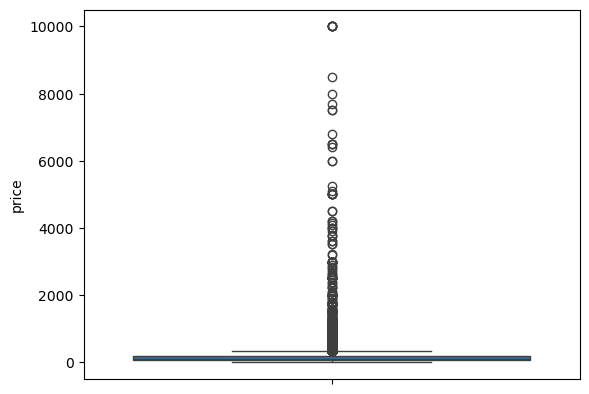

In [101]:
# Checking and managing outliers from the price column

sn.boxplot(df['price'])


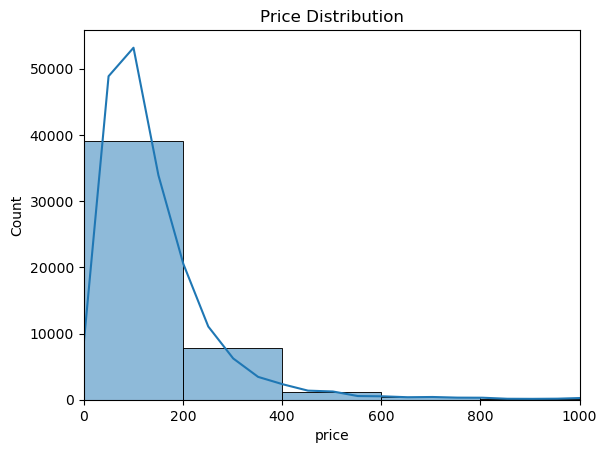

In [103]:
# Exploratory Data Analysis

sn.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, 1000)  # Limit to $1000 for visibility
plt.title('Price Distribution')
plt.show()

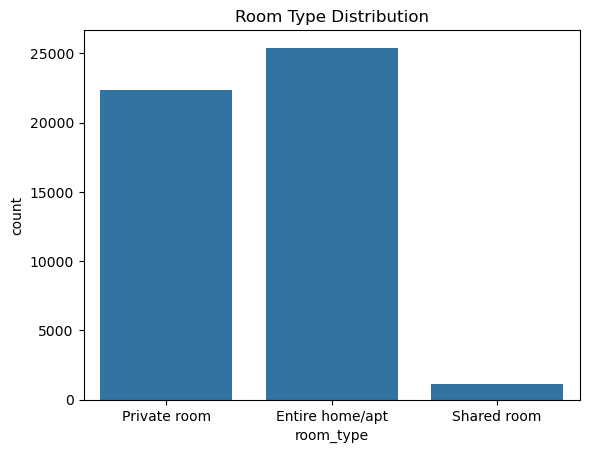

In [104]:
# Exploring the variety fo rooms

sn.countplot(data=df, x='room_type')
plt.title('Room Type Distribution')
plt.show()


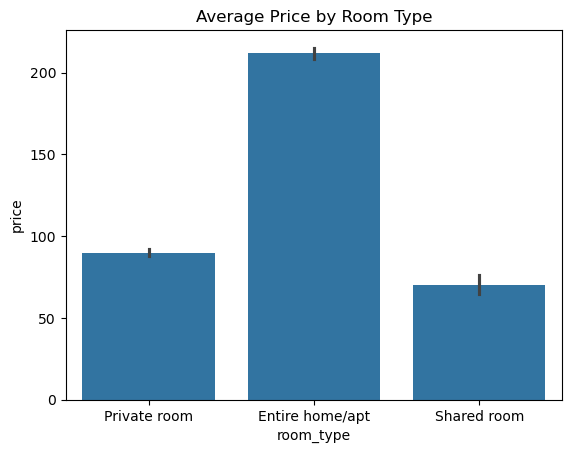

In [107]:
# Comparing room type with average price

sn.barplot(data=df, x='room_type', y='price')
plt.title('Average Price by Room Type')
plt.show()


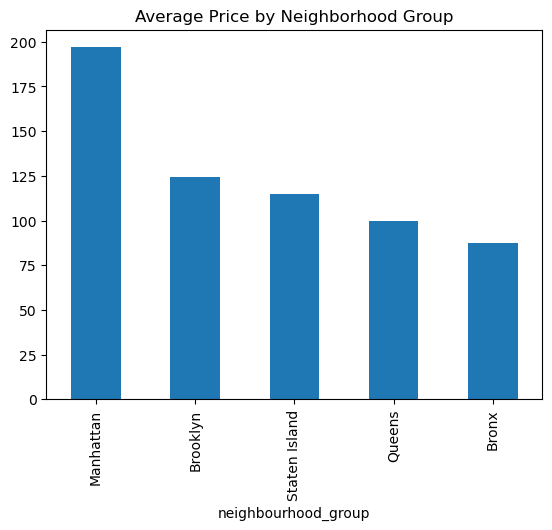

In [108]:
# Comparing average price by neighbourhood

df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by Neighborhood Group')
plt.show()


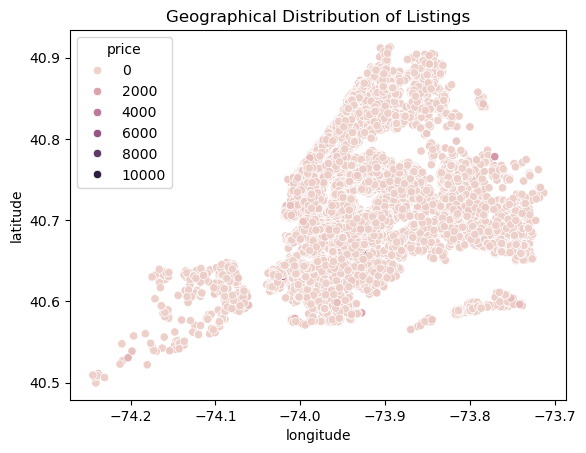

In [109]:
# Mapping listings by location

sn.scatterplot(x='longitude', y='latitude', hue='price', data=df)
plt.title('Geographical Distribution of Listings')
plt.show()


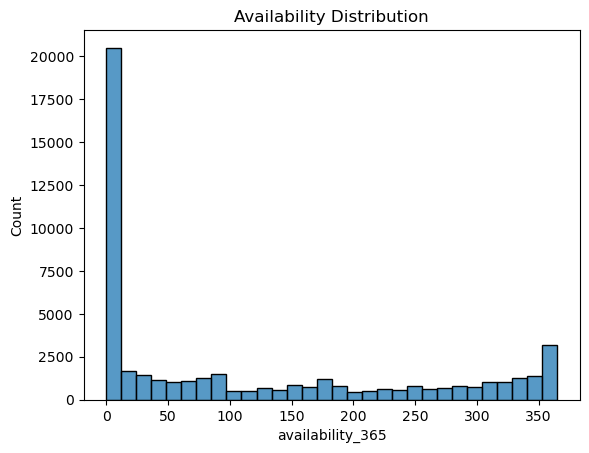

In [110]:
# Checking to see how days listings are available in a year

sn.histplot(df['availability_365'], bins=30)
plt.title('Availability Distribution')
plt.show()


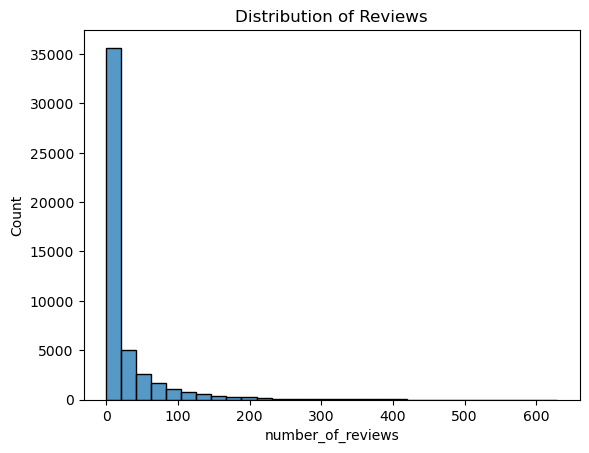

In [111]:
# Number of reviews across listings

sn.histplot(df['number_of_reviews'], bins=30)
plt.title('Distribution of Reviews')
plt.show()


In [119]:
# Correlation Analysis

new_df = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

new_df.corr()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


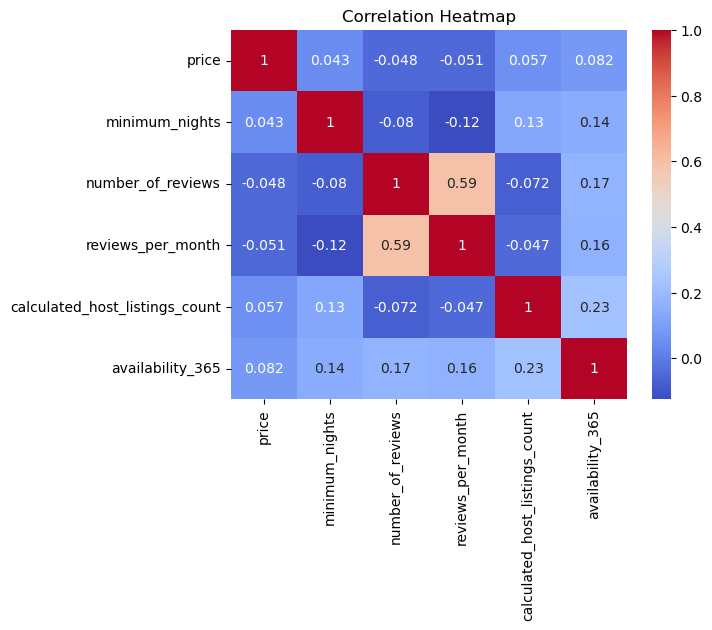

In [120]:
corr_matrix = new_df.corr()
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Summary of Insights

**Key takeaways from the EDA:**
- **Price Distribution:** Most listings are below $500, with a few expensive outliers.
- **Room Types:** Entire homes are the most expensive, while private/shared rooms are cheaper.
- **Neighborhood:** Price varies significantly by neighborhood, with Manhattan being the most expensive.
- **Availability:** Some listings are available year-round, while others have limited availability.